In [1]:
#Libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import MinMaxScaler

C:\Users\vafer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\vafer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#Load Dataset
df = pd.read_csv('Dataset.csv')
X = df.iloc[:, 1:]
y = df['Is_Open']

In [3]:
#Apply Training/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#SMOTE that will be used to upsample training set.
smote = SMOTENC(categorical_features=[2,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
            23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44], random_state=42)

#Apply SMOTE
X_train_upsample, y_train_upsample = smote.fit_resample(X_train, y_train)

#Min-Max Normalization
scaler = MinMaxScaler()
        
#Fit on training set
scaler.fit(X_train_upsample)
        
#scale on training set
X_train_upsample = scaler.transform(X_train_upsample)
        
#scale the test dataset
X_test = scaler.transform(X_test)


In [4]:
#Random Forest model
model = RandomForestClassifier(criterion='entropy', bootstrap=True, max_samples = 0.8, 
                                       random_state=1, min_samples_split = 500)

#fit model
model.fit(X_train_upsample,y_train_upsample)

RandomForestClassifier(criterion='entropy', max_samples=0.8,
                       min_samples_split=500, random_state=1)

In [5]:
#permutation importance
perm = PermutationImportance(model, scoring = 'balanced_accuracy', random_state=1).fit(X_test, y_test)

In [6]:
eli5.show_weights(perm, feature_names = X.columns.tolist(), top=45)

Weight,Feature
0.0531 ± 0.0028,Restaurants
0.0438 ± 0.0030,Call_To_Action_enabled
0.0410 ± 0.0034,Grubhub_enabled
0.0189 ± 0.0020,Home_Services
0.0185 ± 0.0033,Covid_Banner
0.0175 ± 0.0017,Health_&_Medical
0.0139 ± 0.0033,Review_Count
0.0113 ± 0.0028,delivery_or_takeout
0.0105 ± 0.0014,Stars
0.0079 ± 0.0018,Local_Services


Text(0.5, 0, 'Weight')

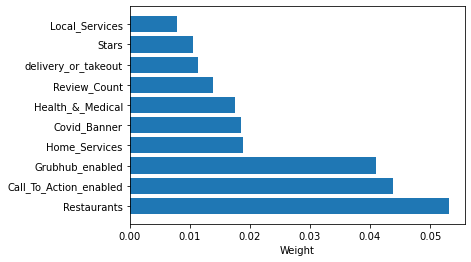

In [7]:
#bar plot

import matplotlib.pyplot as plt

names = ["Restaurants", "Call_To_Action_enabled", "Grubhub_enabled", "Home_Services","Covid_Banner",
        "Health_&_Medical", "Review_Count", "delivery_or_takeout",  "Stars", "Local_Services"]

values = [0.0531, 0.0438, 0.0410, 0.0189, 0.0185, 0.0175, 0.0139, 0.0113, 0.0105, 0.0079]

plt.barh(names,values)
plt.xlabel('Weight')